In [ ]:

!nvidia-smi

Wed Jul 12 16:02:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zAY6whVHyXNY3d6A1rIK")
project = rf.workspace("plasticdetection-wfnym").project("plastci-detection")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to plastic-3 in yolov8:: 100%|██████████| 5176/5176 [00:00<00:00, 6289.91it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data= {dataset.location}/data.yaml epochs=25 imgsz=640 plots=True  optimizer=Adam lr0=1e-3


100% 21.5M/21.5M [00:00<00:00, 189MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False,

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch2145.jpg
confusion_matrix.png				   train_batch2146.jpg
events.out.tfevents.1696927437.39f882fc6998.979.0  train_batch2147.jpg
F1_curve.png					   train_batch2.jpg
P_curve.png					   val_batch0_labels.jpg
PR_curve.png					   val_batch0_pred.jpg
R_curve.png					   val_batch1_labels.jpg
results.csv					   val_batch1_pred.jpg
results.png					   val_batch2_labels.jpg
train_batch0.jpg				   val_batch2_pred.jpg
train_batch1.jpg				   weights


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


NameError: ignored

/content


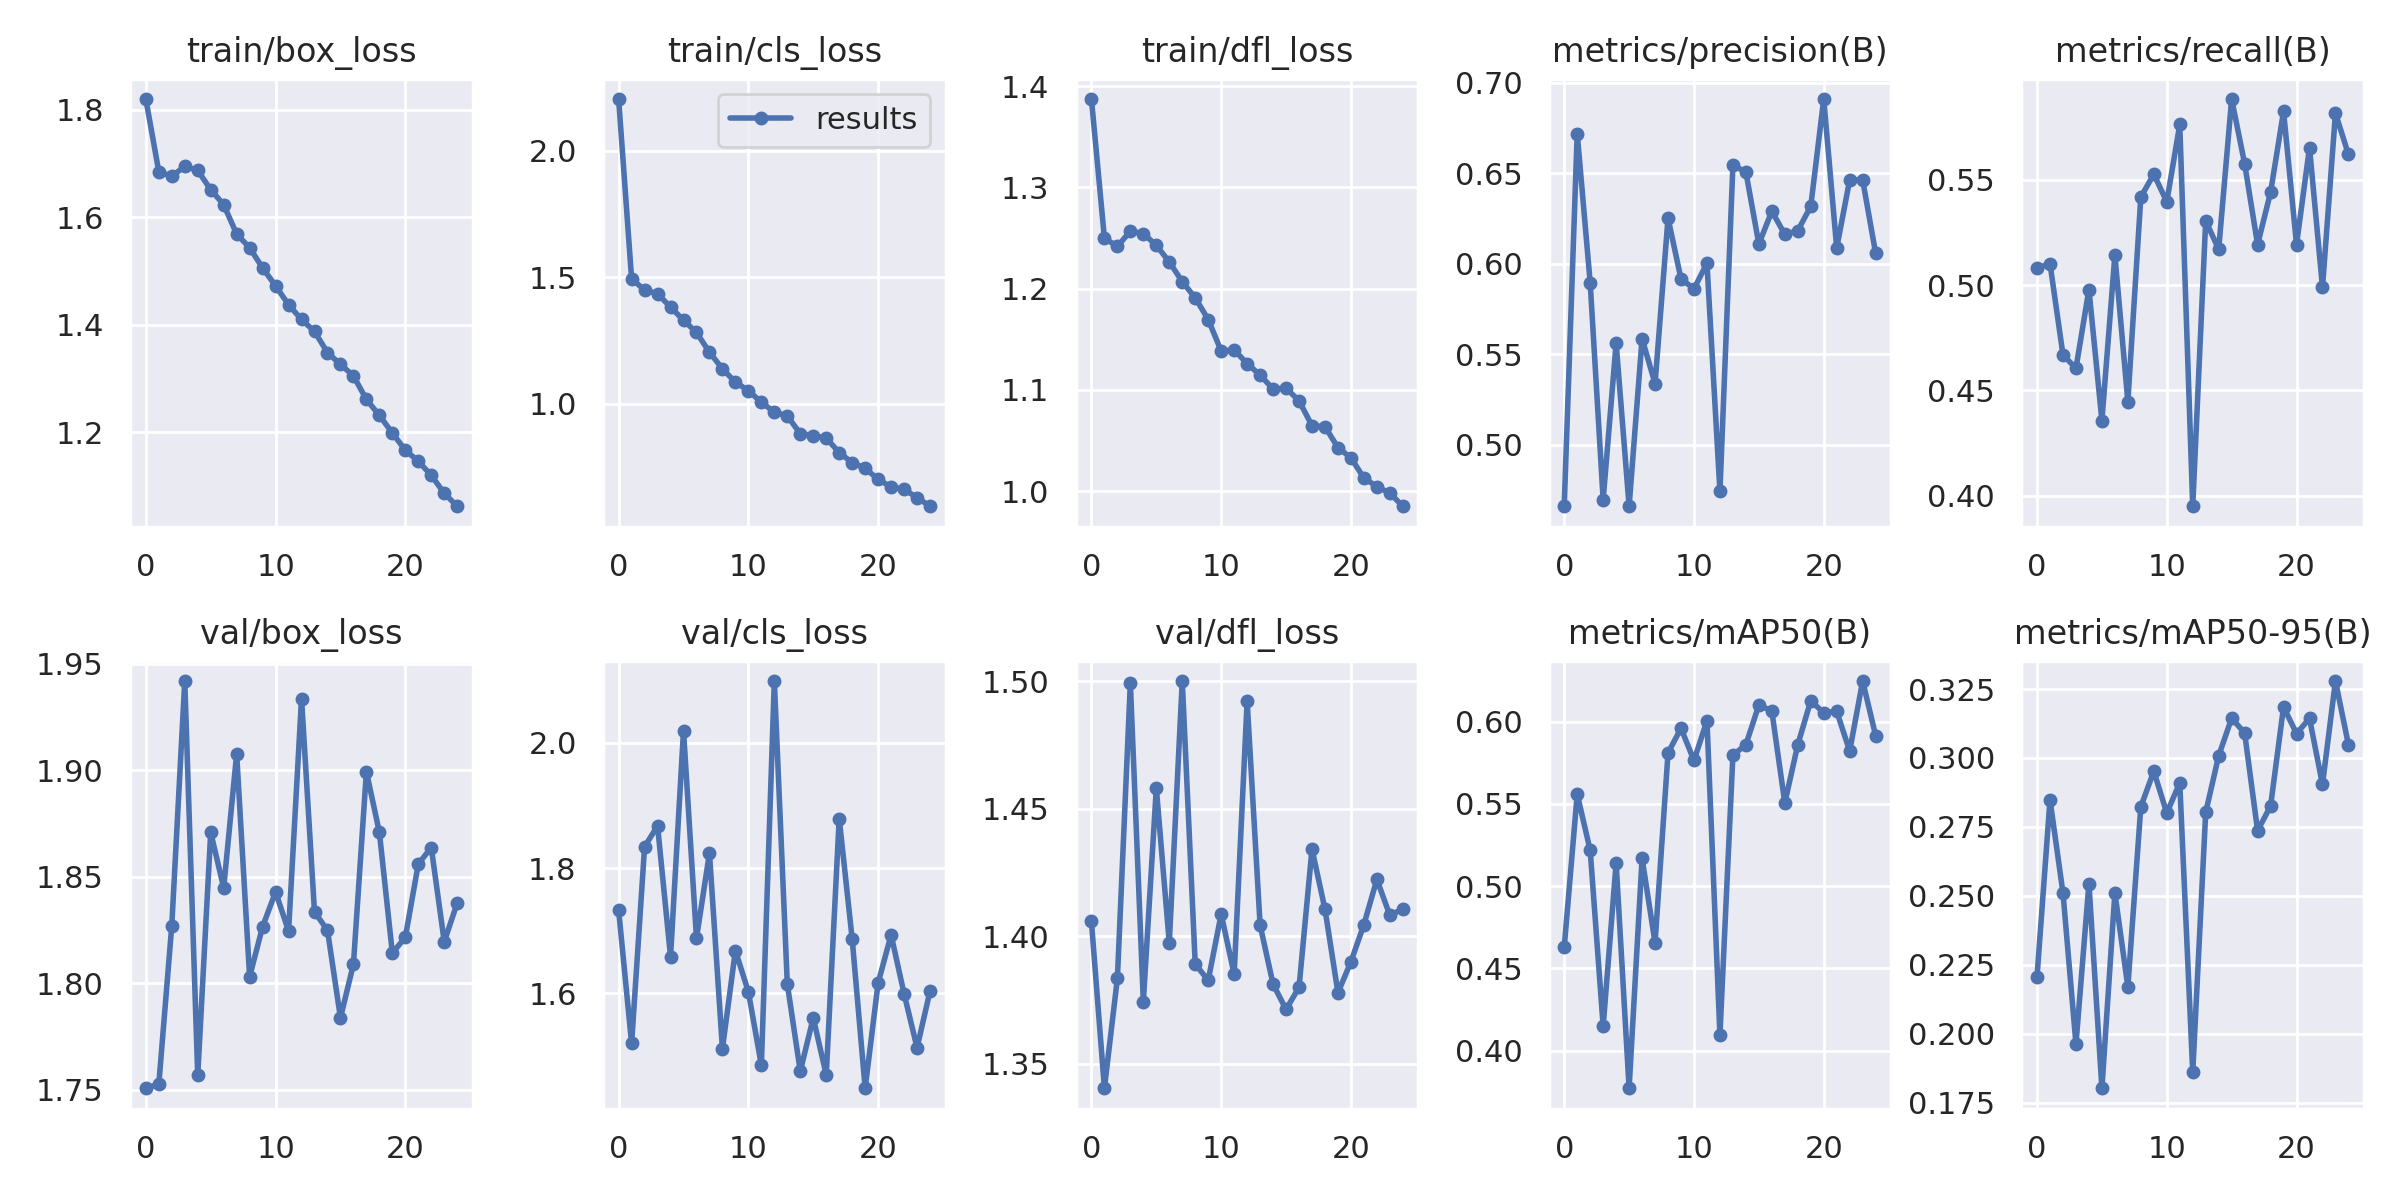

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


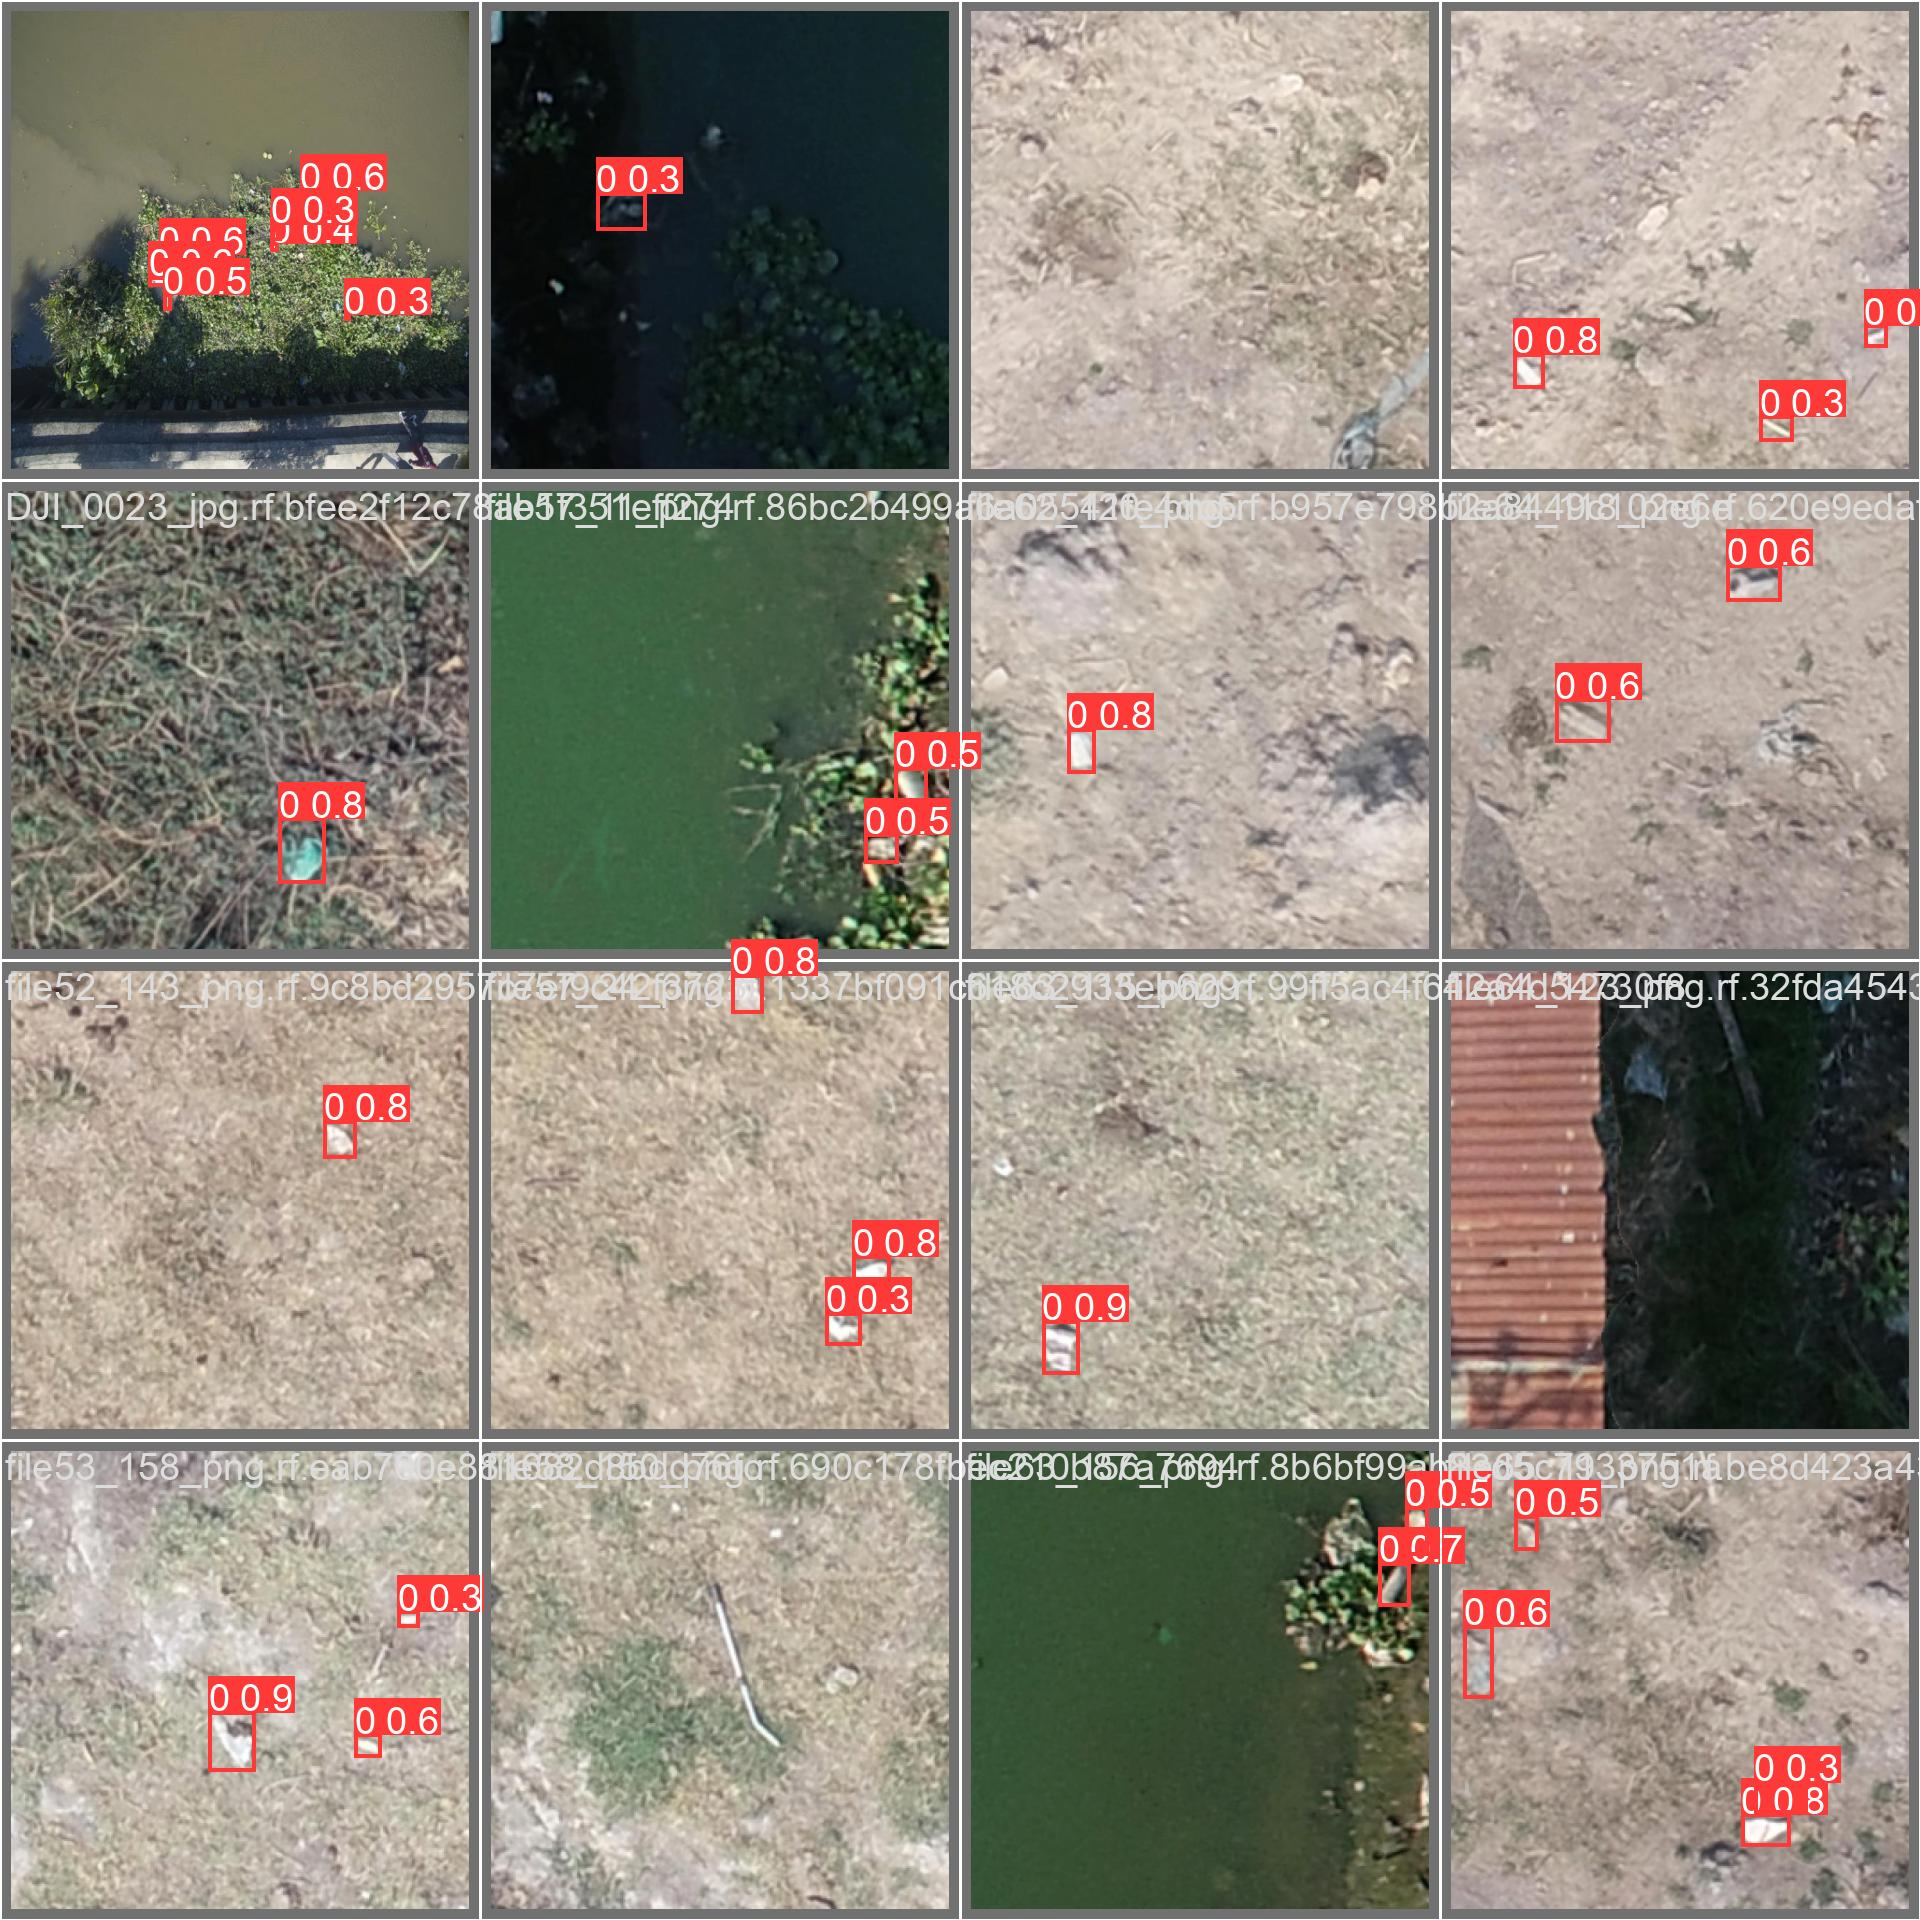

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!pip install tensorrt
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


/content
2023-07-12 16:36:07.401418: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/plastic-detection-prediction-2/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100% 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.37it/s]
                   all         11         57      0.263      0.559      0.317      0.146
                     0         11         48      0.336      0.562      0.484      0.212
                     1         11          9      0.191      0.556      0.151     0.0796
Speed: 0.4ms pre-process, 18.1ms inference, 0.0ms loss, 9.2ms post-process per image


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images/*

/content
2023-07-12 16:35:43.314458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/22 /content/datasets/plastic-detection-prediction-2/test/images/DJI_0016_jpg.rf.15662c7736203e81e6ee586ca5241627.jpg: 800x800 5 0s, 24.7ms
image 2/22 /content/datasets/plastic-detection-prediction-2/test/images/DJI_0021_jpg.rf.2ed1c005688937002aea7676ac037789.jpg: 800x800 3 0s, 24.7ms
image 3/22 /content/datasets/plastic-detection-prediction-2/test/images/DJI_0023_jpg.rf.ced43bd56ddeffb175f415226bef9004.jpg: 800x800 27 0s, 24.8ms
image 4/22 /content/datasets/plastic-detection-prediction-2/test/images/DJI_0068_jpg.rf.5fbb71a55ff2e0d79422903b088d7bf7.jpg: 800x800 6 0s, 24.8ms
image 5/22 /content/datasets/plastic-detection-prediction-2/test/images/DJI_0071_jpg.rf.99cfd064cc10dfac0a0f8f

In [ ]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!yolo model = yolov8n.pt format = onnx

Streaming output truncated to the last 5000 lines.
              backpack        128          6      0.889      0.333      0.611      0.391
              umbrella        128         18      0.757      0.944      0.927      0.698
               handbag        128         19      0.913      0.368      0.586      0.377
                   tie        128          7       0.72      0.571      0.718      0.559
              suitcase        128          4       0.79          1      0.995      0.641
               frisbee        128          5      0.606        0.8      0.721      0.594
                  skis        128          1      0.616          1      0.995      0.597
             snowboard        128          7      0.772      0.714      0.815      0.633
           sports ball        128          6          1      0.644      0.706      0.279
                  kite        128         10      0.588        0.6      0.509      0.166
          baseball bat        128          4      0.779    